# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Observable Trends

# 1: There is a moderate correlation between distance from equator and max temp

# 2: There is no correlation between distance from equator and cloudiness

# 3: There is no correlation between distance from equator and wind speed

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

url = "http://api.openweathermap.org/data/2.5/weather?"



## Generate Cities List

In [30]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
lat = []
lon = []
temp_max = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []
cities_found = []
count = 0

for city in cities:
    
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Get weather data
    try: 
        print("trying city " + str(count) + ": " + city)
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
    
        lat.append(weather_json["coord"]["lat"])
        lon.append(weather_json["coord"]["lon"])
        temp_max.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        clouds.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        
        cities_found.append(city)
        
    except:
        
        print("Could not find: " + city)
    
    count = count + 1
    
    
    

trying city 0: busselton
trying city 1: mataura
trying city 2: bredasdorp
trying city 3: nanortalik
trying city 4: puerto ayora
trying city 5: grand river south east
Could not find: grand river south east
trying city 6: los llanos de aridane
trying city 7: banda aceh
trying city 8: rikitea
trying city 9: axim
trying city 10: te anau
trying city 11: cidreira
trying city 12: hermanus
trying city 13: punta arenas
trying city 14: hamilton
trying city 15: athabasca
trying city 16: jacqueville
trying city 17: saldanha
trying city 18: saint-philippe
trying city 19: bandipur
trying city 20: mys shmidta
Could not find: mys shmidta
trying city 21: otradnoye
trying city 22: tula
trying city 23: moranbah
trying city 24: ibadan
trying city 25: sumbawa
Could not find: sumbawa
trying city 26: limuru
trying city 27: vaitupu
Could not find: vaitupu
trying city 28: vila
trying city 29: uglovka
trying city 30: severo-kurilsk
trying city 31: nkwerre
trying city 32: koslan
trying city 33: san cristobal
try

trying city 293: port hedland
trying city 294: mocambique
Could not find: mocambique
trying city 295: ust-nera
trying city 296: boguchany
trying city 297: nchelenge
trying city 298: ayagoz
trying city 299: nevelsk
trying city 300: padang
trying city 301: derzhavinsk
trying city 302: jaen
trying city 303: jefferson city
trying city 304: santiago
trying city 305: vamdrup
trying city 306: morehead
trying city 307: koster
trying city 308: verkhoyansk
trying city 309: karaul
Could not find: karaul
trying city 310: jumla
trying city 311: acapulco
trying city 312: akdepe
trying city 313: north ogden
trying city 314: tshane
trying city 315: samusu
Could not find: samusu
trying city 316: talnakh
trying city 317: klaksvik
trying city 318: shenjiamen
trying city 319: attawapiskat
Could not find: attawapiskat
trying city 320: namatanai
trying city 321: kurilsk
trying city 322: vagur
trying city 323: iskateley
trying city 324: constitucion
trying city 325: dingle
trying city 326: shumskiy
trying ci

trying city 586: atambua
trying city 587: mounana
trying city 588: surt
trying city 589: kainantu
trying city 590: faya
trying city 591: qasigiannguit
trying city 592: poitiers
trying city 593: sumbe
trying city 594: norman wells
trying city 595: aripuana
trying city 596: tanout
trying city 597: billings
trying city 598: abomsa
trying city 599: salina
trying city 600: dien bien
Could not find: dien bien
trying city 601: westpunt
Could not find: westpunt


In [33]:
cities_df = pd.DataFrame({
    "City": cities_found,
    "Latitude": lat,
    "Longitude": lon,
    "Temperature (F)": temp_max,
    "Humidity (%)": humidity,
    "Cloudiness (%)": clouds,
    "Wind Speed (mph)": wind_speed,
    "Country": country,
    "Date": date
})

In [34]:
cities_df.head()

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,busselton,-33.6500,115.3333,48.96,87,2,7.43,AU,1661469806
1,mataura,-46.1927,168.8643,51.48,56,0,1.52,NZ,1661469806
2,bredasdorp,-34.5322,20.0403,46.13,81,3,7.05,ZA,1661469806
3,nanortalik,60.1432,-45.2371,43.48,93,100,6.71,GL,1661469807
4,puerto ayora,-0.7393,-90.3518,66.54,94,24,4.00,EC,1661469594


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
cities_df.to_csv('cities.csv', index=False)
cities_df.head()

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,busselton,-33.6500,115.3333,48.96,87,2,7.43,AU,1661469806
1,mataura,-46.1927,168.8643,51.48,56,0,1.52,NZ,1661469806
2,bredasdorp,-34.5322,20.0403,46.13,81,3,7.05,ZA,1661469806
3,nanortalik,60.1432,-45.2371,43.48,93,100,6.71,GL,1661469807
4,puerto ayora,-0.7393,-90.3518,66.54,94,24,4.00,EC,1661469594


In [39]:
cities_df.describe()

,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,20.743554,17.916470,67.093971,73.216458,51.869410,7.173363,1.661470e+09
std,34.258460,89.054856,13.753183,19.525225,39.160671,5.236701,1.067155e+02
min,-54.800000,-175.200000,32.160000,9.000000,0.000000,0.000000,1.661470e+09
25%,-9.005950,-58.920900,56.270000,63.000000,11.000000,3.440000,1.661470e+09
50%,26.184200,23.047100,68.110000,78.000000,51.000000,5.790000,1.661470e+09
75%,51.163000,92.892200,77.840000,87.000000,95.500000,9.630000,1.661470e+09
max,78.218600,179.316700,100.090000,100.000000,100.000000,37.980000,1.661470e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

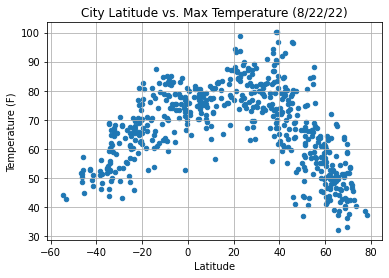

In [42]:
cities_df.plot(kind="scatter", x="Latitude", y="Temperature (F)", grid=True,
              title="City Latitude vs. Max Temperature (8/22/22)")
plt.savefig('Latitude_Temperature.png')
plt.show()

In [41]:
#This plot displays the relationship between max temperature and latitude

## Latitude vs. Humidity Plot

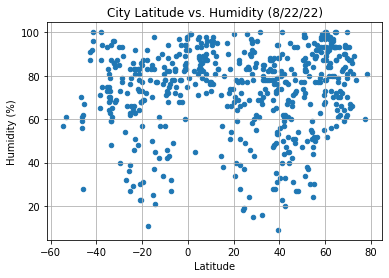

In [43]:
cities_df.plot(kind="scatter", x="Latitude", y="Humidity (%)", grid=True,
              title="City Latitude vs. Humidity (8/22/22)")
plt.savefig('Latitude_Humidity.png')
plt.show()

In [ ]:
# This plot displays the relationship between humidity and latitude

## Latitude vs. Cloudiness Plot

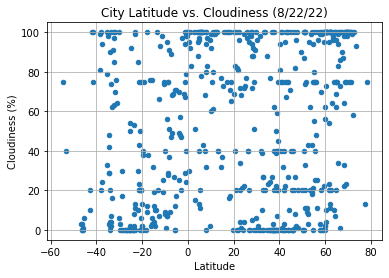

In [44]:
cities_df.plot(kind="scatter", x="Latitude", y="Cloudiness (%)", grid=True,
              title="City Latitude vs. Cloudiness (8/22/22)")
plt.savefig('Latitude_Cloudiness.png')
plt.show()

In [ ]:
# This plot displays the relationship between cloudiness and latitude

## Latitude vs. Wind Speed Plot

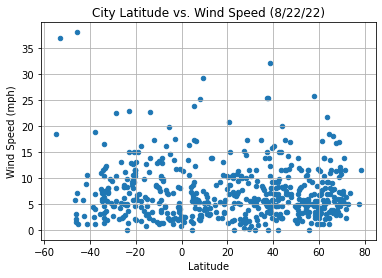

In [45]:
cities_df.plot(kind="scatter", x="Latitude", y="Wind Speed (mph)", grid=True,
              title="City Latitude vs. Wind Speed (8/22/22)")
plt.savefig('Latitude_WingSpeed.png')
plt.show()

In [ ]:
# This plot displays the relationship between wind speed and latitude

## Linear Regression

In [46]:
northern_df = cities_df.loc[cities_df["Latitude"] >= 0]
southern_df = cities_df.loc[cities_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4754507790018925


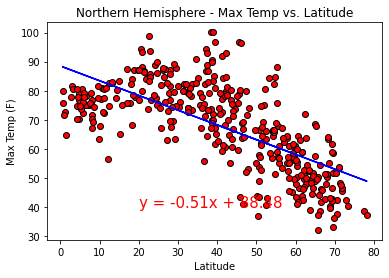

In [49]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Latitude"], northern_df["Temperature (F)"])
regress_values = northern_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_df["Latitude"], northern_df["Temperature (F)"], marker="o", facecolors="red", edgecolors="black")
plt.plot(northern_df["Latitude"],regress_values,"b-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [50]:
# This regression displays the relationship between 
# max temperature and latitude in the northern hemisphere.
# There is a moderate correlation.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5430548173602506


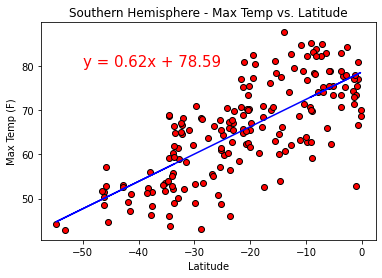

In [51]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Latitude"], southern_df["Temperature (F)"])
regress_values = southern_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_df["Latitude"], southern_df["Temperature (F)"], marker="o", facecolors="red", edgecolors="black")
plt.plot(southern_df["Latitude"],regress_values,"b-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [52]:
# This regression displays the relationship between 
# max temperature and latitude in the southern hemisphere.
# There is a moderate correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0002104035232993731


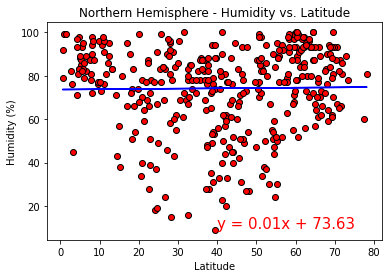

In [53]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Latitude"], northern_df["Humidity (%)"])
regress_values = northern_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_df["Latitude"], northern_df["Humidity (%)"], marker="o", facecolors="red", edgecolors="black")
plt.plot(northern_df["Latitude"],regress_values,"b-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# This regression displays the relationship between 
# humidity and latitude in the northern hemisphere.
# There is very little correlation.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 8.146146178060606e-05


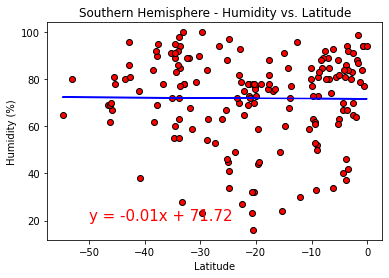

In [55]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Latitude"], southern_df["Humidity (%)"])
regress_values = southern_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_df["Latitude"], southern_df["Humidity (%)"], marker="o", facecolors="red", edgecolors="black")
plt.plot(southern_df["Latitude"],regress_values,"b-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# This regression displays the relationship between 
# humidity and latitude in the southern hemisphere.
# There is very little correlation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0018199683608368078


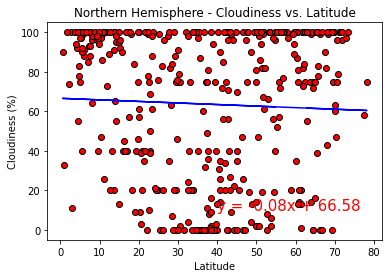

In [56]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Latitude"], northern_df["Cloudiness (%)"])
regress_values = northern_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_df["Latitude"], northern_df["Cloudiness (%)"], marker="o", facecolors="red", edgecolors="black")
plt.plot(northern_df["Latitude"],regress_values,"b-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# This regression displays the relationship between 
# cloudiness and latitude in the northern hemisphere.
# There is very little correlation.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.012065481134180463


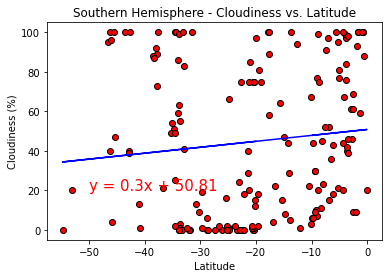

In [57]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Latitude"], southern_df["Cloudiness (%)"])
regress_values = southern_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_df["Latitude"], southern_df["Cloudiness (%)"], marker="o", facecolors="red", edgecolors="black")
plt.plot(southern_df["Latitude"],regress_values,"b-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# This regression displays the relationship between 
# cloudiness and latitude in the southern hemisphere.
# There is very little correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.013803811241202049


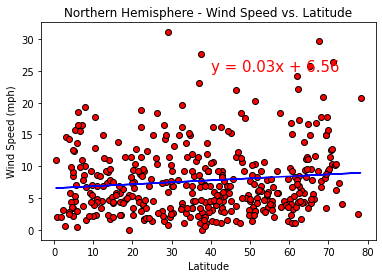

In [59]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Latitude"], northern_df["Wind Speed (mph)"])
regress_values = northern_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_df["Latitude"], northern_df["Wind Speed (mph)"], marker="o", facecolors="red", edgecolors="black")
plt.plot(northern_df["Latitude"],regress_values,"b-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# This regression displays the relationship between 
# wind speed and latitude in the northern hemisphere.
# There is very little correlation.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0044263239607998574


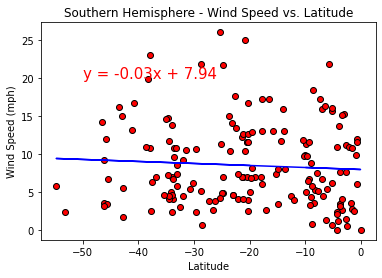

In [60]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Latitude"], southern_df["Wind Speed (mph)"])
regress_values = southern_df["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_df["Latitude"], southern_df["Wind Speed (mph)"], marker="o", facecolors="red", edgecolors="black")
plt.plot(southern_df["Latitude"],regress_values,"b-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# This regression displays the relationship between 
# wind speed and latitude in the southern hemisphere.
# There is very little correlation.